In [6]:
import pandas as pd
list_of_employees = [{"Name":"Jack Smith",
                  "Salary":1000,
                  "JobTitle":"CEO"},
                  {"Name":"Brad Peters",
                  "Salary":700,
                  "JobTitle":"CFO"},
                  {"Name":"Emma Rogers",
                  "Salary":600,
                  "JobTitle":"CTO"},
                  {"Name":"Luke Martin",
                  "Salary":500,
                  "JobTitle":"COO"},
                   {"Name":"Sophie Freeman",
                  "Salary":800,
                  "JobTitle":"CMO"}]
df_employees = pd.DataFrame(list_of_employees)
df_employees

,Name,Salary,JobTitle
0,Jack Smith,1000,CEO
1,Brad Peters,700,CFO
2,Emma Rogers,600,CTO
3,Luke Martin,500,COO
4,Sophie Freeman,800,CMO


In [7]:
df_employees["DateStarted"] = ["01/12/2022","02/11/2022","03/10/2022","04/09/2023","05/08/2023"]
df_employees

,Name,Salary,JobTitle,DateStarted
0,Jack Smith,1000,CEO,01/12/2022
1,Brad Peters,700,CFO,02/11/2022
2,Emma Rogers,600,CTO,03/10/2022
3,Luke Martin,500,COO,04/09/2023
4,Sophie Freeman,800,CMO,05/08/2023


In [8]:
df_employees["DOB"] = ["01/12/2000","02/11/2001","03/10/2002","04/09/2003","05/08/2004"]
df_employees["DOB"] = pd.to_datetime(df_employees["DOB"],dayfirst=True)
df_employees["Age(Days)"] = pd.to_datetime('06/11/23',format='%d/%m/%y')-df_employees["DOB"] # upper case "Y" when using just the first two digits of the year
df_employees["Age"] = df_employees["Age(Days)"]/pd.Timedelta('365 days')
df_employees["Age"] = df_employees["Age"].round().astype('int',errors='ignore')

#df_employees.dtypes
df_employees["DateStarted"] = pd.to_datetime(df_employees["DateStarted"],dayfirst=True)
#df_employees.dtypes
df_employees

,Name,Salary,JobTitle,DateStarted,DOB,Age(Days),Age
0,Jack Smith,1000,CEO,2022-12-01,2000-12-01,8375 days,23
1,Brad Peters,700,CFO,2022-11-02,2001-11-02,8039 days,22
2,Emma Rogers,600,CTO,2022-10-03,2002-10-03,7704 days,21
3,Luke Martin,500,COO,2023-09-04,2003-09-04,7368 days,20
4,Sophie Freeman,800,CMO,2023-08-05,2004-08-05,7032 days,19


In [9]:
foodlist = ["hotdogs","rustlers","aspic","reformed ham","cold omelette"]

print(foodlist)


#for fooditem, name in foodlist.items():
 # print(f"{name} delcious!")

#for i, name in enumerate(foodlist):

#print (f'{name} delicious!')

['hotdogs', 'rustlers', 'aspic', 'reformed ham', 'cold omelette']


In [10]:
import pandas as pd
df_Company1 = pd.DataFrame({'names':["anna","betty","carolina"],
                            'jobtitle':["CEO","COO","CFO"]})

df_Company2 = pd.DataFrame({'names':["alex","ben","carl"],
                            'jobtitle':["designer","programmer","publisher"]})

df_dict = {'Dataframe 1':df_Company1,
           'Dataframe 2':df_Company2}

for k, v in df_dict.items():
    v['originator'] = k
df_dict['Dataframe 1']

,names,jobtitle,originator
0,anna,CEO,Dataframe 1
1,betty,COO,Dataframe 1
2,carolina,CFO,Dataframe 1


In [11]:
demographics = pd.DataFrame({"child_id":["c1","c2","c3","c4"],
              "age_first_contact":[2,4,6,8],
              "gender":["m","f","m","f"]})

nhs_nos = pd.DataFrame({"child_id":["c1","c2","c3","c4"],
              "nhsnos":["n1","n2","n3","n4"]})

ident_nhs = demographics.merge(nhs_nos, how="left",left_on="child_id",right_on="child_id") # this is joining tables together

ident_nhs

,child_id,age_first_contact,gender,nhsnos
0,c1,2,m,n1
1,c2,4,f,n2
2,c3,6,m,n3
3,c4,8,f,n4


In [12]:
cp_plans = pd.DataFrame({"child_id":["c1","c2","c4"],
              "cpstartdate":["01/01/2020","01/01/2021","01/01/2023"]})

df_left = ident_nhs.merge(cp_plans, how="left",on="child_id")
df_left["cpstartdate"] = df_left['cpstartdate'].fillna('no cp plan')
df_inner = ident_nhs.merge(cp_plans, how="inner",on="child_id")

print(df_left)
print(df_inner)

  child_id  age_first_contact gender nhsnos cpstartdate
0       c1                  2      m     n1  01/01/2020
1       c2                  4      f     n2  01/01/2021
2       c3                  6      m     n3  no cp plan
3       c4                  8      f     n4  01/01/2023
  child_id  age_first_contact gender nhsnos cpstartdate
0       c1                  2      m     n1  01/01/2020
1       c2                  4      f     n2  01/01/2021
2       c4                  8      f     n4  01/01/2023


In [13]:
df_employees

staffids = pd.DataFrame({"Name":["Jack Smith","Sophie Freeman","Emma Rogers"],
              "StaffID":["1","2","3"]})

df_left = df_employees.merge(staffids, how="left",on="Name")
df_left

,Name,Salary,JobTitle,DateStarted,DOB,Age(Days),Age,StaffID
0,Jack Smith,1000,CEO,2022-12-01,2000-12-01,8375 days,23,1
1,Brad Peters,700,CFO,2022-11-02,2001-11-02,8039 days,22,NaN
2,Emma Rogers,600,CTO,2022-10-03,2002-10-03,7704 days,21,3
3,Luke Martin,500,COO,2023-09-04,2003-09-04,7368 days,20,NaN
4,Sophie Freeman,800,CMO,2023-08-05,2004-08-05,7032 days,19,2


In [14]:
import pandas as pd
df_HomeworkCompany = pd.DataFrame({'EmployeeID':["E001","E002","E003","E004","E005"],
                            'Age':[25,28,33,30,26],
                            'Salary':[28000,29000,35000,35000,28000],
                            'Job Title':["CMO","CFO","CEO","COO","CMO"]})

df_HomeworkCompany.dtypes
df_HomeworkCompany


,EmployeeID,Age,Salary,Job Title
0,E001,25,28000,CMO
1,E002,28,29000,CFO
2,E003,33,35000,CEO
3,E004,30,35000,COO
4,E005,26,28000,CMO


In [15]:
sal_min_max = f"Salary minimum:{df_HomeworkCompany['Salary'].min()},Salary maximum:{df_HomeworkCompany['Salary'].max()}"
print(sal_min_max)
Salary_Sum= (df_HomeworkCompany["Salary"].sum())
print(Salary_Sum)
Age_Mean = (df_HomeworkCompany["Age"].mean())
print(Age_Mean)
df_HomeworkCompany["Name"] = ["Doctor Placeholder","John Doe","Jane Doe","Adam Blank","Jack Empty"]
Longest_Name=(max(df_HomeworkCompany['Name'], key=len)) 
Len_Longest_Name=len((max(df_HomeworkCompany['Name'], key=len)) )
print(f'{Longest_Name} Length={Len_Longest_Name}')
Age_Median = (df_HomeworkCompany["Age"].median())
Salary_Median = (df_HomeworkCompany["Salary"].median())

Salary minimum:28000,Salary maximum:35000
155000
28.4
Doctor Placeholder Length=18


In [16]:
greater_than = df_HomeworkCompany[df_HomeworkCompany['Salary'] > Salary_Median]
print(greater_than)

  EmployeeID  Age  Salary Job Title        Name
2       E003   33   35000       CEO    Jane Doe
3       E004   30   35000       COO  Adam Blank


In [17]:
median_age_and_a = df_HomeworkCompany[(df_HomeworkCompany['Age'] > Age_Median) & (df_HomeworkCompany['Name'].str.contains("B"))]
print(median_age_and_a)

  EmployeeID  Age  Salary Job Title        Name
3       E004   30   35000       COO  Adam Blank


In [18]:
import pandas as pd
df_child = pd.DataFrame({'ChildID':["child1","child2","child3","child4"],
                            'Gender':["0","1","2","7"],
                            'DOB':["05/05/2015","12/12/2020","01/01/2000","09/12/2017"],
                            'Ethnicity':["BANG","WOTH","MOTH","WIRI"],
                            'PLACE':["B1","T1","X2","W1"]})
df_child["DOB"] = pd.to_datetime(df_child["DOB"],dayfirst=True)
df_child

,ChildID,Gender,DOB,Ethnicity,PLACE
0,child1,0,2015-05-05,BANG,B1
1,child2,1,2020-12-12,WOTH,T1
2,child3,2,2000-01-01,MOTH,X2
3,child4,7,2017-12-09,WIRI,W1


In [19]:
df_child["Age"] = (pd.to_datetime('20/11/23',format='%d/%m/%y')-df_child["DOB"]) /pd.Timedelta('365 days')
df_child["Age"] = df_child["Age"].round().astype('int',errors='ignore')

filter_child = df_child[(df_child["Gender"]=="7") | (df_child["Ethnicity"]=="BANG") | (df_child["Age"]>=18)]

#print(filter_child)

invalid_gender = df_child["Gender"]=="7"
excluding_invalid_gender = df_child[invalid_gender]
including_invalid_gender = df_child[~invalid_gender]

invalid_ethnic = df_child["Ethnicity"]=="BANG"
excluding_invalid_ethnic = df_child[invalid_ethnic]
including_invalid_ethnic = df_child[~invalid_ethnic]

print(excluding_invalid_gender)
print(including_invalid_gender)
print(excluding_invalid_ethnic)
print(including_invalid_ethnic)

valid_place_age  = df_child["Age"]>=18 , df_child["PLACE"]=="T1"
#excluding_invalid_place_age = df_child[valid_place_age]
#print(excluding_invalid_place_age)
print([valid_place_age])



  ChildID Gender        DOB Ethnicity PLACE  Age
3  child4      7 2017-12-09      WIRI    W1    6
  ChildID Gender        DOB Ethnicity PLACE  Age
0  child1      0 2015-05-05      BANG    B1    9
1  child2      1 2020-12-12      WOTH    T1    3
2  child3      2 2000-01-01      MOTH    X2   24
  ChildID Gender        DOB Ethnicity PLACE  Age
0  child1      0 2015-05-05      BANG    B1    9
  ChildID Gender        DOB Ethnicity PLACE  Age
1  child2      1 2020-12-12      WOTH    T1    3
2  child3      2 2000-01-01      MOTH    X2   24
3  child4      7 2017-12-09      WIRI    W1    6
[(0    False
1    False
2     True
3    False
Name: Age, dtype: bool, 0    False
1     True
2    False
3    False
Name: PLACE, dtype: bool)]


In [20]:
corporation = [{'Name':'Will LP',
                'Salary':'10000',
                'Job Title':'Employee'},
                {'Name':'Annie LP',
                'Salary':'15000',
                'Job Title':'CEO'},
                {'Name':'Naiomi LP',
                'Salary':'90000',
                'Job Title':'VP'},
                {'Name':'Luke V',
                'Salary':'45000',
                'Job Title':'Teach Lead'},
                {'Name':'Matt K',
                'Salary':'30000',
                'Job Title':'Comms'},
                {'Name':'Hannah K',
                'Salary':'38000',
                'Job Title':'HR'},]

corp_df = pd.DataFrame(corporation)
corp_df['Date Started'] = ['05/12/1993', '01/01/2000', '01/01/2020', '23/12/1989', '10/10/2010', '17/12/2021']
corp_df['Date Started'] = pd.to_datetime(corp_df['Date Started'], format='%d/%m/%Y')
corp_df

,Name,Salary,Job Title,Date Started
0,Will LP,10000,Employee,1993-12-05
1,Annie LP,15000,CEO,2000-01-01
2,Naiomi LP,90000,VP,2020-01-01
3,Luke V,45000,Teach Lead,1989-12-23
4,Matt K,30000,Comms,2010-10-10
5,Hannah K,38000,HR,2021-12-17


In [21]:
# Equals ==
# Not Equal to !=
# Greater than >
# Greater than or equal to >=
# Less than <
# Less than or equal to <=
# Not ~

corp_df["Salary"]=corp_df["Salary"].astype("int")

mask = corp_df["Salary"]>40000
#print(mask)
over_40k = corp_df[mask]
over_40k                   

,Name,Salary,Job Title,Date Started
2,Naiomi LP,90000,VP,2020-01-01
3,Luke V,45000,Teach Lead,1989-12-23


In [22]:
x = 1
numbers_list = []

for i in list(range(10)):
    numbers_list.append(x)
    x=(x+numbers_list[i-1])

numbers_list

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [23]:
answers= []
times_tables ={}
for i  in list(range(1,11)):
    for j in list (range(1,11)):
        answers.append(i * j)
    times_tables[i] = answers
    answers=[]

multiplication_table = pd.DataFrame(times_tables)
multiplication_table.index +=1
multiplication_table

,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10
2,2,4,6,8,10,12,14,16,18,20
3,3,6,9,12,15,18,21,24,27,30
4,4,8,12,16,20,24,28,32,36,40
5,5,10,15,20,25,30,35,40,45,50
6,6,12,18,24,30,36,42,48,54,60
7,7,14,21,28,35,42,49,56,63,70
8,8,16,24,32,40,48,56,64,72,80
9,9,18,27,36,45,54,63,72,81,90
10,10,20,30,40,50,60,70,80,90,100


In [24]:
spreads = ['butter', 'jam', 'peanut butter']
toppings = ['ham', 'cheese', 'sardines']
filling = []
combinations = {}

for i in spreads:
    for j in toppings:
        filling.append(f'{i}  {j}')
    combinations[i] = filling
    filling=[]

c_df = pd.DataFrame(combinations)
c_df['toppings'] = filling


c_df






ValueError: Length of values (0) does not match length of index (3)

In [ ]:
import pandas as pd

import os

df = pd.read_csv("/workspaces/ERN-sessions/data/1980 2023 average house prices.csv")
df['Period'] = pd.to_datetime(df['Period'], format='%Y-%m')

df

,Name,Period,House price index All property types,Average price All property types,Percentage change (monthly) All property types,Percentage change (yearly) All property types
0,United Kingdom,1980-01-01,10.11,19273,3.94,28.59
1,United Kingdom,1980-02-01,10.11,19273,3.94,28.59
2,United Kingdom,1980-03-01,10.11,19273,3.94,28.59
3,United Kingdom,1980-04-01,10.51,20044,4.00,24.15
4,United Kingdom,1980-05-01,10.51,20044,4.00,24.15
...,...,...,...,...,...,...
518,United Kingdom,2023-03-01,148.20,282548,-1.00,3.20
519,United Kingdom,2023-04-01,148.90,283871,0.50,2.50
520,United Kingdom,2023-05-01,149.50,285053,0.40,1.60
521,United Kingdom,2023-06-01,151.20,288281,1.10,1.90


In [ ]:
Highest_price= (df["Average price All property types"].max())
Lowest_price= (df["Average price All property types"].min())
Mean_price= (df["Average price All property types"].mean())
Median_price= (df["Average price All property types"].median())
house_info_list = [Highest_price,Lowest_price,Mean_price,Median_price]
for x in (house_info_list):
    print (x),

words=['high','low','mean','median']

for i in [0,1,2,3]:
    print(f'{words[i]}:{house_info_list[i]}')


292187
19273
120570.55831739961
97964.0
high:292187
low:19273
mean:120570.55831739961
median:97964.0


In [ ]:
print((1>2) & (2==2)) #and statement
print((1>2) | (2==2)) #or statement
print((3>2)|(2==2))
print((3>2)&(2==2))

print(("hope"=="here") & ("suffer"=="suffer"))
print(("hope"=="here") | ("suffer"=="suffer"))


False
True
True
True
False
True


In [ ]:
#df_under_median = df[df['Average price All property types']<df['Average price All property types'].median()]


df_under_mean_median = df[(df['Average price All property types']<df['Average price All property types'].median()) &
                          (df["Average price All property types"] < df["Average price All property types"].mean())]
df_under_mean_median

,Name,Period,House price index All property types,Average price All property types,Percentage change (monthly) All property types,Percentage change (yearly) All property types
0,United Kingdom,1980-01-01,10.11,19273,3.94,28.59
1,United Kingdom,1980-02-01,10.11,19273,3.94,28.59
2,United Kingdom,1980-03-01,10.11,19273,3.94,28.59
3,United Kingdom,1980-04-01,10.51,20044,4.00,24.15
4,United Kingdom,1980-05-01,10.51,20044,4.00,24.15
...,...,...,...,...,...,...
254,United Kingdom,2001-03-01,48.85,93136,-0.52,10.06
255,United Kingdom,2001-04-01,50.61,96499,3.61,8.15
256,United Kingdom,2001-05-01,50.61,96499,3.61,8.15
257,United Kingdom,2001-06-01,50.61,96499,3.61,8.15


In [ ]:
over_mean = df['Average price All property types'] > df['Average price All property types'].mean()
under_median = df['Average price All property types'] > df['Average price All property types'].median()
condition = over_mean | under_median


df_over_under = df[~condition]

change_less_mean = df['Percentage change (monthly) All property types'] < df['Percentage change (monthly) All property types'].mean()
change_less_median = df['Percentage change (yearly) All property types'] < df['Percentage change (yearly) All property types'].median()

condition2 = change_less_mean & change_less_median

df_change_less_both = df[condition2]
df_change_less_both

,Name,Period,House price index All property types,Average price All property types,Percentage change (monthly) All property types,Percentage change (yearly) All property types
21,United Kingdom,1981-10-01,11.24,21425,-1.95,2.53
22,United Kingdom,1981-11-01,11.24,21425,-1.95,2.53
23,United Kingdom,1981-12-01,11.24,21425,-1.95,2.53
24,United Kingdom,1982-01-01,10.96,20897,-2.46,-0.19
25,United Kingdom,1982-02-01,10.96,20897,-2.46,-0.19
...,...,...,...,...,...,...
518,United Kingdom,2023-03-01,148.20,282548,-1.00,3.20
519,United Kingdom,2023-04-01,148.90,283871,0.50,2.50
520,United Kingdom,2023-05-01,149.50,285053,0.40,1.60
521,United Kingdom,2023-06-01,151.20,288281,1.10,1.90


In [ ]:
df = pd.DataFrame({'ChildId':['id1', 'id2', 'id3', 'id4', 'id5'],
                   'Age first contact':[6,12,11,1,19],
                   'Gender':['M','m', 'F', '', 'F' ],
                   'Birthday':['01/01/2002', '02/02/2003', pd.NA, '03/03/2023', '06/01/2012'],
                   'Age':[5,12,11,6,2],
                   'CP Plan?':['Y', 'n', 'N', 'No', 'yES'],})
df['Birthday'] = pd.to_datetime(df['Birthday'], dayfirst=True)
df

,ChildId,Age first contact,Gender,Birthday,Age,CP Plan?
0,id1,6,M,2002-01-01,5,Y
1,id2,12,m,2003-02-02,12,n
2,id3,11,F,NaT,11,N
3,id4,1,,2023-03-03,6,No
4,id5,19,F,2012-01-06,2,yES


In [ ]:
contact_older_than_age = df['Age']<df['Age first contact']
df['CP Plan?'] = df['CP Plan?'].str.lower()
CP_Y = df['CP Plan?'].str.contains("y")
#CP_Y = df['CP Plan?'].str.lower().str.contains("y") - combines it all in one rather than making separate column
condition3 = contact_older_than_age & CP_Y
df_filtered = df[condition3]
df_filtered



,ChildId,Age first contact,Gender,Birthday,Age,CP Plan?
0,id1,6,M,2002-01-01,5,y
4,id5,19,F,2012-01-06,2,yes


In [ ]:
#if (where something is true, do this)
#else (if the if statemtne wasn't true, do this)
#elif else-if (if that wasn't true but this is do this)

if(1>2) ==False:
    print('x')
else:
    print("y")

list_nums0 = list(range(1,21,2)) #third value in range function defines step i.e 1,3,5...

list_nums = list(range(1,21))
for number in list_nums:
    if number %2 == 0: # if remainer after number divided by 2 is a whole number
        print(f'use the modulus sign %')
    else:
        print(f'{number} is not an even number')


x
1 is not an even number
use the modulus sign %
3 is not an even number
use the modulus sign %
5 is not an even number
use the modulus sign %
7 is not an even number
use the modulus sign %
9 is not an even number
use the modulus sign %
11 is not an even number
use the modulus sign %
13 is not an even number
use the modulus sign %
15 is not an even number
use the modulus sign %
17 is not an even number
use the modulus sign %
19 is not an even number
use the modulus sign %


In [ ]:
list_even=[]
list_odd=[]
list_zero=[]
new_nums = range(21)
for number in new_nums:
    if (number %2 == 0) & (number > 0): 
        print(f"{number} is even and not zero")
        list_even.append(number)
    elif (~number %2 == 0) & (number >0): #could have used != to denote not equal to
        print(f'{number} is odd and not zero')
        list_odd.append(number)
    else:
        print(f'{number} is zero')
        list_zero.append(number)

print(list_even)
print(list_odd)
print(list_zero)


0 is zero
1 is odd and not zero
2 is even and not zero
3 is odd and not zero
4 is even and not zero
5 is odd and not zero
6 is even and not zero
7 is odd and not zero
8 is even and not zero
9 is odd and not zero
10 is even and not zero
11 is odd and not zero
12 is even and not zero
13 is odd and not zero
14 is even and not zero
15 is odd and not zero
16 is even and not zero
17 is odd and not zero
18 is even and not zero
19 is odd and not zero
20 is even and not zero
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[0]


Text(0.5, 0, 'Year')

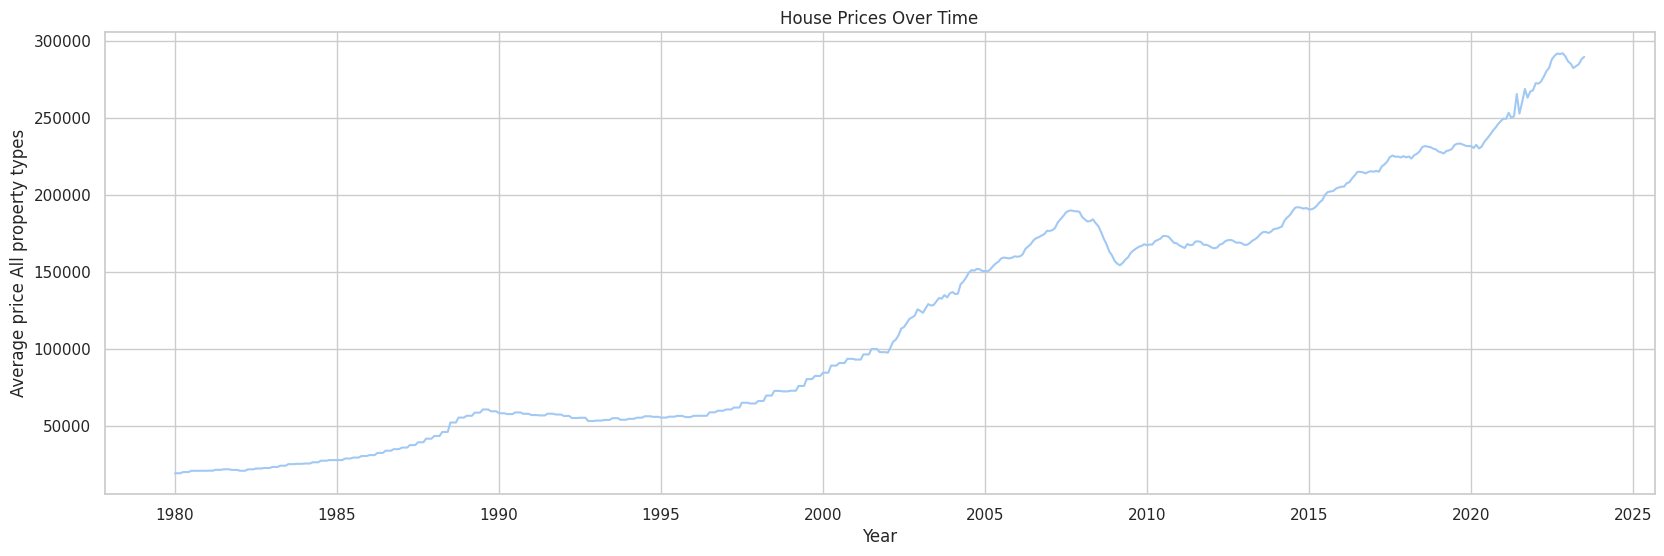

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

df = pd.read_csv("/workspaces/ERN-sessions/data/1980 2023 average house prices.csv")
df['Period'] = pd.to_datetime(df['Period'], format='%Y-%m')

df

#sns.lineplot(data=df, y="Average price All property types", x="Period")

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.set_palette("pastel")
sns.lineplot(data=df, x='Period', y='Average price All property types', marker='')
plt.title("House Prices Over Time")
plt.xlabel("Year")

In [ ]:
## Session 3 Group work
#Work out how to use zip() to collect elements from two lists together and use a loop to print them element-wise, so, if I had 1, 2, 3, 4, 5 and a, b, c, d, e stored as seprate lists, my loop would print a1, b2, etc.

import pandas as pd
list_1 = ["Jon","Emily","Michael","Paul"]
list_2 = ["Maggs","Dickson","MacAllister","Dryden"]

list_3=zip(list_1, list_2)
list(list_3)


#a=[1,2,3]
#b=['a','b','c']
#c=zip(a,b)
#(list(c))

[('Jon', 'Maggs'),
 ('Emily', 'Dickson'),
 ('Michael', 'MacAllister'),
 ('Paul', 'Dryden')]

In [ ]:
import pandas as pd
fullname = []
name_combos = {}

for forename in list_1:
    for surname in list_2:
        fullname.append(f'{forename} {surname}')
    name_combos[forename] = fullname
    fullname = []
    

combinations_df = (pd.DataFrame(name_combos))
combinations_df["surname"] = list_2
combinations_df.set_index("surname", inplace = True)
combinations_df



,Jon,Emily,Michael,Paul
surname,,,,
Maggs,Jon Maggs,Emily Maggs,Michael Maggs,Paul Maggs
Dickson,Jon Dickson,Emily Dickson,Michael Dickson,Paul Dickson
MacAllister,Jon MacAllister,Emily MacAllister,Michael MacAllister,Paul MacAllister
Dryden,Jon Dryden,Emily Dryden,Michael Dryden,Paul Dryden


In [ ]:
#Write a for loop that takes a list of numbers, finds the square of each, and adds the squares to a new list that starts empty.

# list_squares = []
# df0 ={}

# for squares in list(range(1,100)):
#     list_squares.append(squares**2)
#     df0[squares] = list_squares
#     list_squares=[]

# df0



numbers = [1,2,3,4,5]
squares = []

for number in numbers:
    square = number ** 2
    squares.append(square)

print(squares)
    


[1, 4, 9, 16, 25]


In [ ]:
#Write a loop that sums all the numbers up to 100, and assigns the answer to a variable

# sums = []

# for i in list(range(0,100)):
#     number+=i
#     sum = number=i
#     sums.append(sum)

# print(sums)


total=0
for i in range(1,101):
    total+=i
    
print(total)

5050


In [ ]:
import pandas as pd

df = pd.read_csv("/workspaces/ERN-sessions/data/1980 2023 average house prices.csv")
df['Period'] = pd.to_datetime(df['Period'], format='%Y-%m')

Highest_percent_change= (df["Percentage change (monthly) All property types"].max())
Lowest_percent_change= (df["Percentage change (monthly) All property types"].min())
Mean_percent_change= (df["Percentage change (monthly) All property types"].mean())

print(f"{Highest_percent_change} is the highest percent change")
print(f"{Lowest_percent_change} is the lowest percent change")

df

condition = df['Percentage change (monthly) All property types'] > Mean_percent_change
df_filtered = df[condition]
df_filtered

13.29 is the highest percent change
-4.79 is the lowest percent change


,Name,Period,House price index All property types,Average price All property types,Percentage change (monthly) All property types,Percentage change (yearly) All property types
0,United Kingdom,1980-01-01,10.11,19273,3.94,28.59
1,United Kingdom,1980-02-01,10.11,19273,3.94,28.59
2,United Kingdom,1980-03-01,10.11,19273,3.94,28.59
3,United Kingdom,1980-04-01,10.51,20044,4.00,24.15
4,United Kingdom,1980-05-01,10.51,20044,4.00,24.15
...,...,...,...,...,...,...
500,United Kingdom,2021-09-01,141.09,269003,3.29,11.37
502,United Kingdom,2021-11-01,140.23,267370,1.53,8.66
504,United Kingdom,2022-01-01,143.05,272738,1.72,9.23
508,United Kingdom,2022-05-01,147.10,280433,1.30,11.60


In [ ]:
up_to_100 = list(range(1,101))
#up_to_100 = list(range(1,101,2)) using this, will step up at intervals of 2, therefore starting at 1, will only show odd numbers
print(up_to_100)
total_evens=0
for i in up_to_100:
    if i %2 == 0:
        total_evens+=i

print(total_evens)

total_odds=0
for i in up_to_100:
    if i %2 != 0:
        total_odds+=i

print(total_odds)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
2550
2500


In [35]:

# function to check if a number is Narcissistic or not
def is_narcissistic(num):
    # find the number of digits in the number
    num_digits = len(str(num))
    # initialize the sum to 0
    sum = 0
    # iterate through each digit in the number
    for digit in str(num):
        # add the digit raised to the power of the number of digits to the sum
        sum += int(digit) ** num_digits
    # check if the sum is equal to the number
    if sum == num:
        return True
    else:
        return False
# find Narcissistic numbers in the range 1 to 1000
for i in range(1, 100000):
    if is_narcissistic(i):
        print(i)


1
2
3
4
5
6
7
8
9
153
370
371
407
1634
8208
9474
54748
92727
93084
